## Ensembles

### Бэггинг (bagging, bootstrap aggregation)
- Метод ансамблей, когда обучаем несколько моделей на случайных подвыборках исходных данных и усредняем их предсказания.
- Процесс генерации подвыборок с помощью семплирования с возвращением называется бутстрепом (bootstrap)
- Смещение не меняется
- Дисперсия ансамбля уменьшается в 𝑘 раз по сравнению с дисперсией одной модели.
- Чем больше моделей в ансамбле, тем стабильнее результат. 

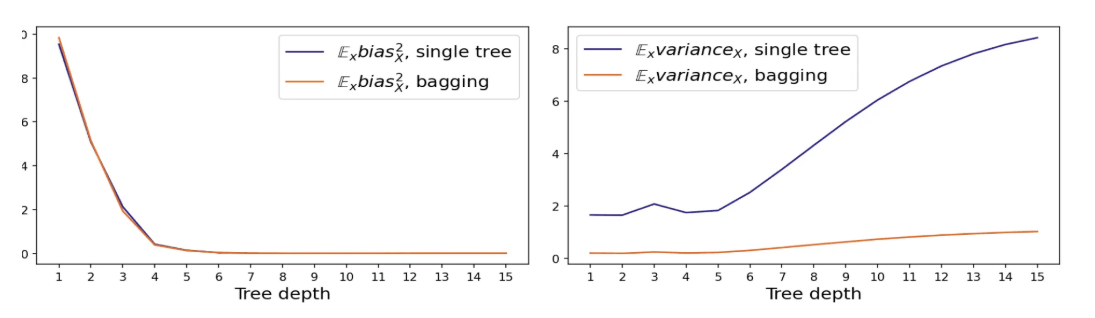

In [16]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Сгенерируем простой датасет
X, y = make_classification(n_samples=500, n_features=8, n_informative=4, n_redundant=1,
n_classes=2, flip_y=0.05, class_sep=1.0, random_state=42)


# Разделим на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
stratify=y, random_state=42)


# ----- Обычное дерево решений -----
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)


print("=== Обычное дерево решений ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


# ----- Бэггинг с деревьями -----
bag = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5),
n_estimators=25, bootstrap=True, random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)


print("\n=== Бэггинг (25 деревьев) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

=== Обычное дерево решений ===
Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        75
           1       0.87      0.63      0.73        75

    accuracy                           0.77       150
   macro avg       0.79      0.77      0.76       150
weighted avg       0.79      0.77      0.76       150


=== Бэггинг (25 деревьев) ===
Accuracy: 0.8133333333333334
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        75
           1       0.85      0.76      0.80        75

    accuracy                           0.81       150
   macro avg       0.82      0.81      0.81       150
weighted avg       0.82      0.81      0.81       150



### Random Forest
- Ансамбль глубоких решающих деревьев.

- Каждое дерево обучается на бутстреп-выборке (с возвращением).

- В каждой вершине выбирается случайное подмножество признаков для поиска сплита (random subspace).

- Предсказания деревьев усредняются (регрессия) или голосуют за класс (классификация).

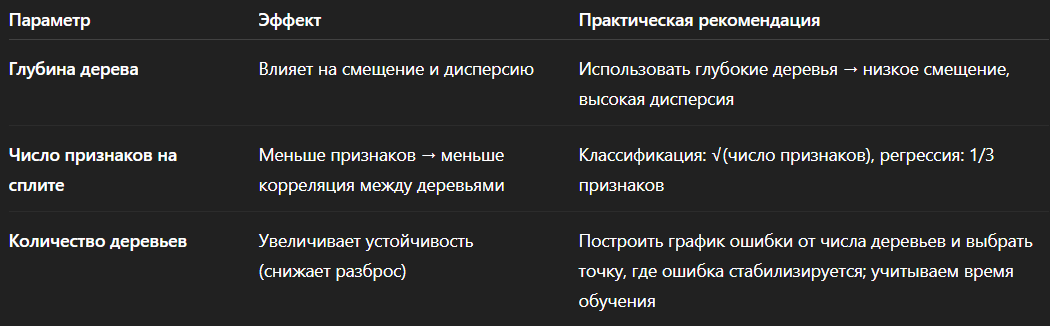

In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Загружаем данные
X, y = make_classification(n_samples=500, n_features=8, n_informative=4, n_redundant=1,
n_classes=2, flip_y=0.05, class_sep=1.0, random_state=42)

# 2. Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Создаём случайный лес
rf = RandomForestClassifier(
    n_estimators=1000,      # число деревьев
    max_depth=25,        # использовать глубокие деревья
    max_features=4,   # sqrt для классификации
    bootstrap=True,        # бутстреп-выборки
    random_state=42,
    n_jobs=-1              # использовать все ядра процессора
)

# 4. Обучаем модель
rf.fit(X_train, y_train)

# 5. Предсказание
y_pred = rf.predict(X_test)

# 6. Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8133333333333334
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        75
           1       0.83      0.79      0.81        75

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



### Бустинг (boosting) 
 - это ансамблевый метод, в котором так же, как и в методах выше, строится множество базовых алгоритмов из одного семейства, объединяющихся затем в более сильную модель. 
 - Отличие состоит в том, что в бэггинге и случайном лесе базовые алгоритмы учатся независимо и параллельно, а в бустинге — последовательно.
 - Каждый следующий базовый алгоритм в бустинге обучается так, чтобы уменьшить общую ошибку всех своих предшественников. Как следствие, итоговая композиция будет иметь меньшее смещение, чем каждый отдельный базовый алгоритм (хотя уменьшение разброса также может происходить).

In [22]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Данные
X, y = make_classification(
    n_samples=500, n_features=8, n_informative=4, n_redundant=1,
    n_classes=2, flip_y=0.05, class_sep=1.0, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 2. Базовый алгоритм (слабый классификатор — дерево небольшой глубины)
base_tree = DecisionTreeClassifier(max_depth=1, random_state=42)

# 3. AdaBoost
ada = AdaBoostClassifier(
    estimator=base_tree,
    n_estimators=50,     
    learning_rate=1.0, 
    algorithm="SAMME",
    random_state=42
)

# 4. Обучаем
ada.fit(X_train, y_train)

# 5. Предсказание
y_pred = ada.predict(X_test)

# 6. Оценка
print("=== AdaBoost ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== AdaBoost ===
Accuracy: 0.7533333333333333
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        75
           1       0.77      0.72      0.74        75

    accuracy                           0.75       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.75      0.75      0.75       150



### Градиентный бустинг
#### Интуиция
- Мы строим композицию моделей (деревьев), где каждое новое дерево исправляет ошибки предыдущих.
- Идея: приближать функцию ошибки рядом Тейлора, используя антиградиент как направление улучшения.

Пример: 
- Представьте гольфиста: каждый удар приближает мяч к лунке.  
- Точно так же каждое дерево приближает прогнозы к целевым значениям.


#### Основная идея
1. Начинаем с простого прогноза (обычно среднее по целевой переменной).
2. Считаем **остатки** = реальные значения − предсказанные.
3. Обучаем маленькое дерево на остатках (это приближение антиградиента).
4. Обновляем прогноз:  
   $$
   F_{m}(x) = F_{m-1}(x) + \eta \cdot h_m(x)
   $$
   где eta — learning rate, h_m(x) — новое дерево.
5. Повторяем шаги 2–4, пока не достигнем нужного качества.


#### Ключевые параметры
- **Learning rate (η):** шаг обновления (меньше = стабильнее, но нужно больше деревьев).
- **Глубина деревьев:** контролирует сложность отдельных слабых моделей.
- **Количество деревьев:** чем больше, тем выше качество, но дольше обучение.


### XGBoost
- XGBoost строит деревья по принципу: «Строим дерево последовательно по уровням до достижения максимальной глубины». Отдельного ограничения на количество вершин нет, так как оно естественным образом получается из ограничения на глубину дерева. В XGBoost деревья «стремятся» быть симметричными по глубине, и в идеале получается полное бинарное дерево, если это не противоречит другим ограничениям (например, ограничению на минимальное количество объектов в листе). Такие деревья обычно являются более устойчивыми к переобучению.

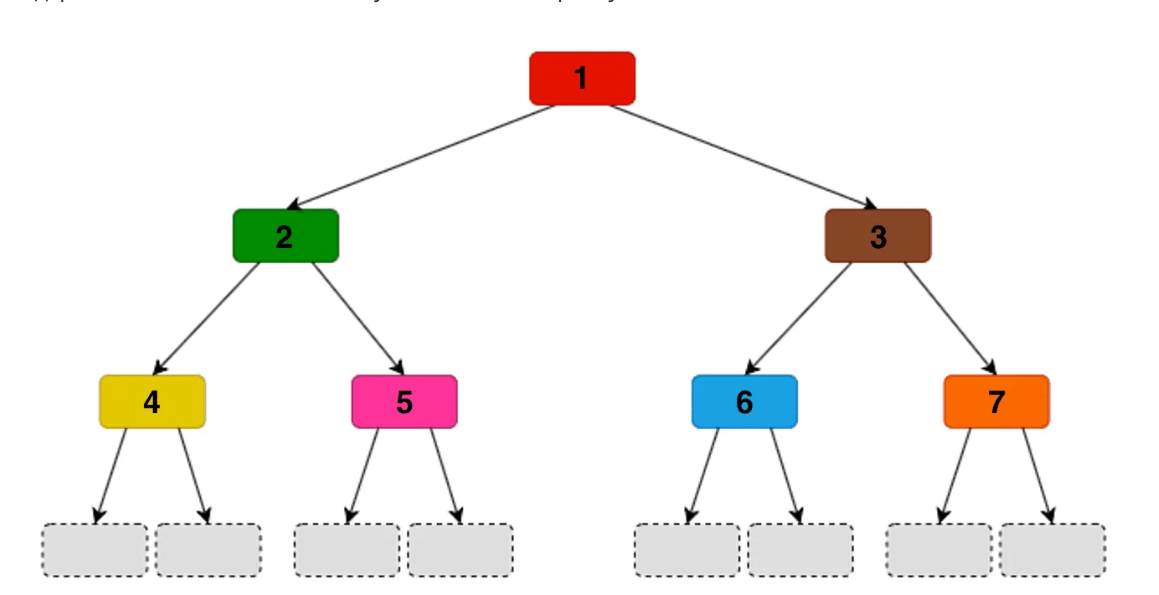

- Высокая скорость и эффективность: XGBoost оптимизирован для быстрой работы и эффективно использует вычислительные ресурсы, включая аппаратное ускорение на GPU и возможность распределенного обучения. 

- Масштабируемость: Библиотека отлично справляется с очень большими наборами данных и может работать как на одном компьютере, так и в распределенных системах, таких как Apache Spark и Hadoop. 

- Регуляризация: Включает в себя методы регуляризации, что помогает предотвратить переобучение модели и улучшить ее обобщающую способность. 

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# 1. Данные
X, y = make_classification(
    n_samples=500, n_features=8, n_informative=4, n_redundant=1,
    n_classes=2, flip_y=0.05, class_sep=1.0, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = XGBClassifier(
    n_estimators=1000,
    objective="binary:logistic",
    max_depth=10,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("=== XGBoost ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== XGBoost ===
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        75
           1       0.86      0.81      0.84        75

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



### LightGBM
- LightGBM строит деревья по принципу: «На каждом шаге делим вершину с наилучшим скором», а основным критерием остановки выступает максимально допустимое количество вершин в дереве. Это приводит к тому, что деревья получаются несимметричными, то есть поддеревья могут иметь разную глубину — например, левое поддерево может иметь глубину 2, а правое может разрастись до глубины 15
С одной стороны, это позволяет быстро подогнаться под обучающие данные. С другой — бесконтрольный рост дерева в глубину неизбежно ведет к переобучению, поэтому LightGBM позволяет помимо количества вершин ограничивать и максимальную глубину.

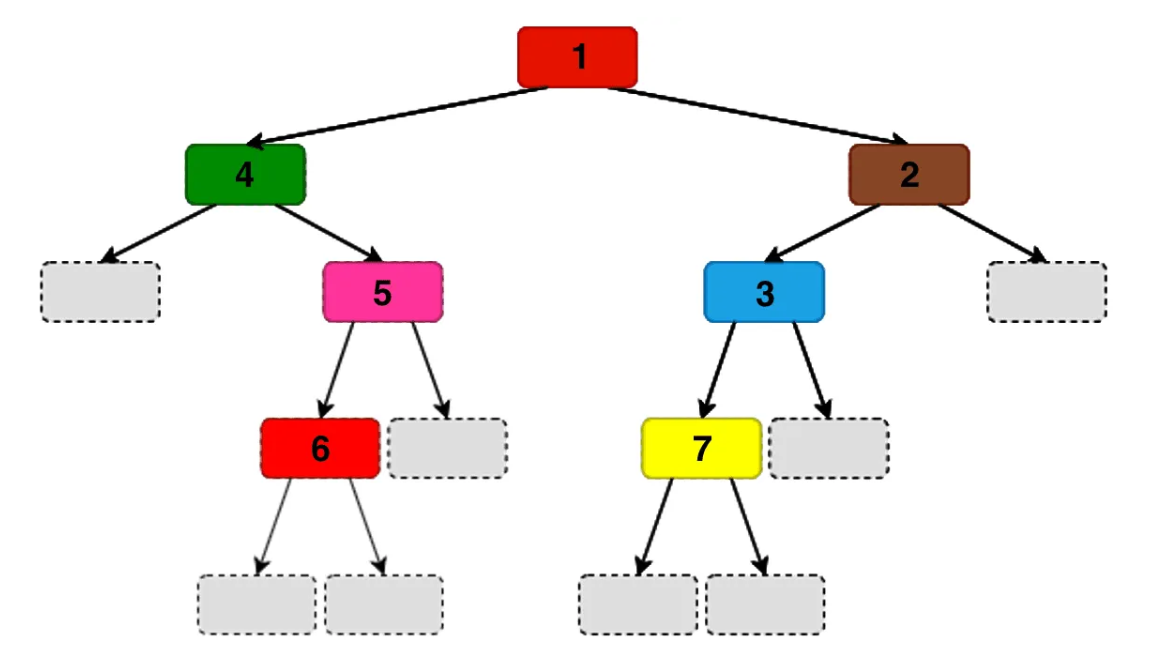

- Очень быстро работает, особенно на больших наборах данных.

- Эффективно использует память.

In [27]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier

# 1. Данные
X, y = make_classification(
    n_samples=500, n_features=8, n_informative=4, n_redundant=1,
    n_classes=2, flip_y=0.05, class_sep=1.0, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    metric='binary_logloss',
    num_leaves=32,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=1000,
    random_state=42,
    verbose=-1
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("=== lightGBM ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== lightGBM ===
Accuracy: 0.8533333333333334
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        75
           1       0.91      0.79      0.84        75

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150



### CatBoost
- CatBoost строит деревья по принципу: «Все вершины одного уровня имеют одинаковый предикат». Одинаковые сплиты во всех вершинах одного уровня позволяют избавиться от ветвлений (конструкций if-else) в коде инференса модели с помощью битовых операций и получить более эффективный код, который в разы ускоряет применение модели, в особенности в случае применения на батчах.
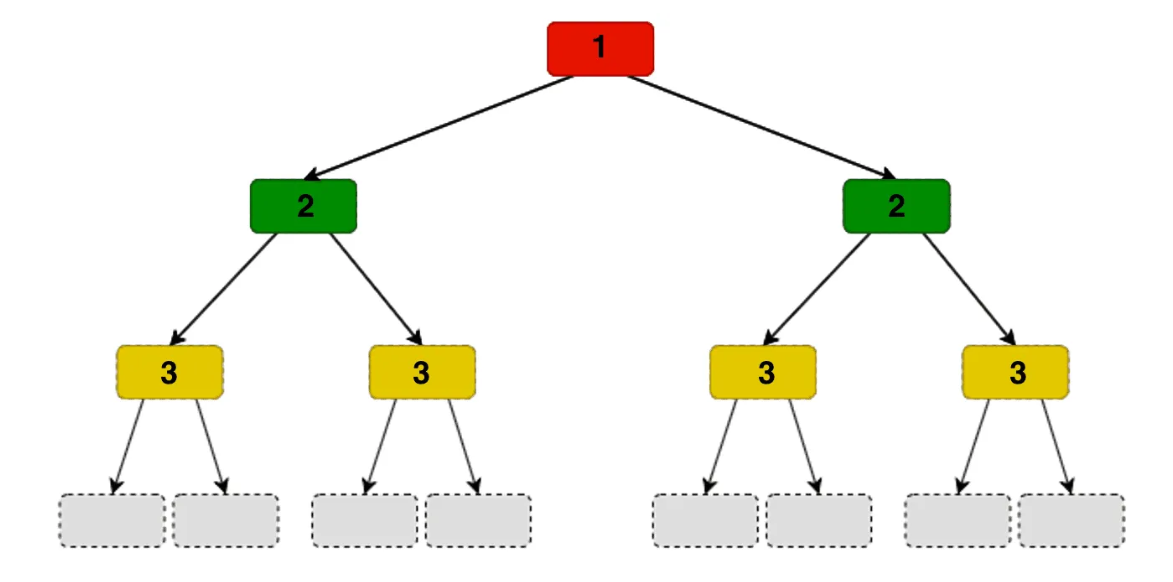

- умеет автоматически обрабатывать категориальные признаки без сложного препроцессинга, достаточно передать список таких признаков (cat_features)


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier

# 1. Данные
X, y = make_classification(
    n_samples=500, n_features=8, n_informative=4, n_redundant=1,
    n_classes=2, flip_y=0.05, class_sep=1.0, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = CatBoostClassifier(
    iterations=1000,        
    learning_rate=0.1,      
    depth=6,              
    loss_function='Logloss', 
    random_seed=42,
    verbose=0
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("=== CatBoost ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== CatBoost ===
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        75
           1       0.88      0.79      0.83        75

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split   
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier


url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

X = df.drop("Survived", axis=1)
y = df["Survived"]

cat_features = ["Sex", "Embarked", "Name", "Ticket", "Cabin"]
X[cat_features] = X[cat_features].fillna("missing")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = CatBoostClassifier(
    iterations=1000,        
    learning_rate=0.1,      
    depth=6,              
    loss_function='Logloss', 
    random_seed=42,
    verbose=100
)

model.fit(X_train, y_train, cat_features=cat_features)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

0:	learn: 0.6314904	total: 55.6ms	remaining: 55.6s
100:	learn: 0.2603384	total: 3.77s	remaining: 33.6s
200:	learn: 0.1577373	total: 7.53s	remaining: 29.9s
300:	learn: 0.1125161	total: 11.4s	remaining: 26.4s
400:	learn: 0.0826683	total: 15.3s	remaining: 22.8s
500:	learn: 0.0632312	total: 19.1s	remaining: 19s
600:	learn: 0.0512586	total: 23.2s	remaining: 15.4s
700:	learn: 0.0413112	total: 27s	remaining: 11.5s
800:	learn: 0.0341431	total: 30.8s	remaining: 7.66s
900:	learn: 0.0293567	total: 34.8s	remaining: 3.83s
999:	learn: 0.0258020	total: 39s	remaining: 0us
Accuracy: 0.8156424581005587


### Стекинг
- Стекинг — это метод ансамблевого обучения, при котором несколько базовых моделей обучаются на исходных данных, а затем их предсказания используются в качестве признаков для обучения мета-модели. Это позволяет объединить сильные стороны различных алгоритмов и улучшить общую производительность модели.
- Преимущества:
    - Может значительно улучшить точность модели.
    - Использует разнообразие моделей, что снижает риск переобучения.

- Недостатки:
    - Требует больше вычислительных ресурсов.
    - Может быть сложнее в интерпретации.

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Загрузка данных
X, y = make_classification(n_samples=500, n_features=8, n_informative=4, n_redundant=1,
n_classes=2, flip_y=0.05, class_sep=1.0, random_state=42)


# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Определение базовых моделей
base_learners = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier(max_depth=3)),
    ('svc', SVC(probability=True))
]

# Определение мета-модели
meta_model = LogisticRegression()
simple_model = LogisticRegression()
# Создание стекинг-классификатора
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Обучение модели
stacking_clf.fit(X_train, y_train)
simple_model.fit(X_train, y_train)
# Оценка модели
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred_simple = simple_model.predict(X_test)
accuracy_simple = accuracy_score(y_test, y_pred_simple)

print("=== Логистическая регрессия ===")
print(f'Accuracy: {accuracy_simple:.4f}')

print("=== Стекинг ===")
print(f'Accuracy: {accuracy:.4f}')


=== Логистическая регрессия ===
Accuracy: 0.6867
=== Стекинг ===
Accuracy: 0.8200
